In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [30]:
raw_df = pd.read_csv('rosbank_train.csv')
raw_df.head(5)
# target_sum - можно выкинуть, переменная участвует в другой задаче

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [31]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 10 columns):
PERIOD          490513 non-null object
cl_id           490513 non-null int64
MCC             490513 non-null int64
channel_type    487603 non-null object
currency        490513 non-null int64
TRDATETIME      490513 non-null object
amount          490513 non-null float64
trx_category    490513 non-null object
target_flag     490513 non-null int64
target_sum      490513 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 37.4+ MB


In [32]:
raw_df= raw_df.drop("target_sum", axis=1)

In [33]:
raw_df.head(5)

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0


In [34]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 9 columns):
PERIOD          490513 non-null object
cl_id           490513 non-null int64
MCC             490513 non-null int64
channel_type    487603 non-null object
currency        490513 non-null int64
TRDATETIME      490513 non-null object
amount          490513 non-null float64
trx_category    490513 non-null object
target_flag     490513 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 33.7+ MB


In [35]:
print("Total clients: ", len(raw_df.cl_id.unique()))

Total clients:  5000


In [7]:
raw_df.shape

(490513, 9)

In [8]:
raw_df.cl_id.value_counts().head()

2143    784
5373    512
5630    501
4564    499
1261    485
Name: cl_id, dtype: int64

Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [36]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)
cl_ids_test_set 

{1,
 8195,
 6153,
 4107,
 4108,
 6155,
 2064,
 4116,
 20,
 2068,
 23,
 2072,
 8216,
 4120,
 4123,
 28,
 25,
 24,
 31,
 6176,
 8226,
 4132,
 6181,
 4136,
 8234,
 4140,
 4141,
 4142,
 8237,
 46,
 50,
 2098,
 6196,
 8246,
 4156,
 6205,
 4159,
 6207,
 4164,
 2119,
 4169,
 4172,
 76,
 2125,
 4177,
 6227,
 85,
 6230,
 88,
 6234,
 2143,
 4192,
 96,
 6244,
 100,
 6246,
 4202,
 107,
 2155,
 8300,
 8305,
 4211,
 2166,
 4221,
 4222,
 130,
 4229,
 8327,
 6283,
 2191,
 4244,
 149,
 6293,
 4248,
 8349,
 4256,
 162,
 163,
 2215,
 6312,
 2217,
 4263,
 8364,
 4269,
 4270,
 2223,
 177,
 6322,
 6323,
 180,
 2229,
 8374,
 8375,
 2231,
 2233,
 186,
 187,
 6334,
 6337,
 2241,
 6342,
 2249,
 2250,
 4300,
 2253,
 207,
 211,
 2261,
 6359,
 8408,
 217,
 8409,
 6364,
 8415,
 225,
 4323,
 8419,
 2277,
 8421,
 6374,
 2279,
 8424,
 2283,
 4340,
 4344,
 4347,
 259,
 4355,
 2309,
 4360,
 2316,
 272,
 6422,
 4376,
 8472,
 4378,
 2331,
 2332,
 8476,
 2334,
 4382,
 2340,
 294,
 297,
 6442,
 2348,
 8494,
 302,
 6448,
 30

In [37]:
# create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  392887
Total transactions in test dataset:  97626


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
5. **Дополнительная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
6. Задания принимаются в виде ноутбука с кодов/картинками выполненной обязательной части + указанием места в leaderboard при решении дополнительной

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    

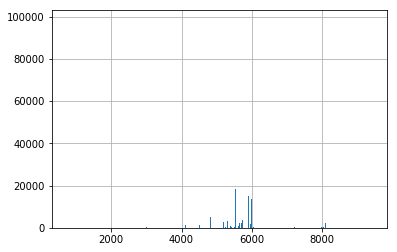

In [179]:
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,day_of_week,hour,day_of_week_number,weekend,part_of_day,a,b,MCC_simp
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,Saturday,0,5,1,3,NaN,5200,5200
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,Thursday,12,3,0,1,NaN,6011,6011
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,Tuesday,0,1,0,3,NaN,5921,5921
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,Saturday,0,5,1,3,NaN,5411,5411
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,Tuesday,13,1,0,1,NaN,6012,6012


In [132]:
# выделить самые популярные MCC -вообще первый 20 типов более 80 процентов операции охватвают,
#для модели можно будет это свернуть в хвост 
raw_df['a'].value_counts(normalize=True).head(20)

1.0     0.234568
2.0     0.141975
3.0     0.104938
4.0     0.074074
7.0     0.061728
6.0     0.049383
5.0     0.049383
15.0    0.049383
14.0    0.037037
9.0     0.037037
18.0    0.030864
11.0    0.024691
13.0    0.018519
12.0    0.018519
8.0     0.018519
19.0    0.018519
10.0    0.012346
17.0    0.012346
16.0    0.006173
Name: a, dtype: float64

In [ ]:
#Это и попробуем сделать

In [170]:
c=raw_df['MCC'].value_counts().head(20).index.tolist()
def b(code):
    #c=raw_df['MCC'].value_counts().head(20).index.tolist()
    if code in c:
        return code
    else:
        return 'other code'
raw_df['MCC_simp'] = raw_df.apply(lambda row: b(row.MCC), axis=1)


In [178]:
raw_df['MCC_simp'] = raw_df.apply(lambda row: b(row.MCC), axis=1)


,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,day_of_week,hour,day_of_week_number,weekend,part_of_day,MCC_simp
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,Saturday,0,5,1,3,5200
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,Thursday,12,3,0,1,6011
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,Tuesday,0,1,0,3,5921
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,Saturday,0,5,1,3,5411
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,Tuesday,13,1,0,1,6012


In [183]:
raw_df.trx_category.value_counts()

POS               416425
DEPOSIT            21216
WD_ATM_ROS         19104
WD_ATM_PARTNER      9948
C2C_IN              7306
WD_ATM_OTHER        7140
C2C_OUT             5456
BACK_TRX            2687
CAT                 1197
CASH_ADV              34
Name: trx_category, dtype: int64

In [ ]:
#помотреть активность клиентов по дням недели/времени 	12OCT17:12:24:07

In [ ]:
from datetime import datetime
import calendar



In [48]:
# не знаю зачем создадим названия дней недели
raw_df['day_of_week'] = df['TRDATETIME'].apply(lambda x: calendar.day_name[datetime.strptime(x, '%d%b%y:%H:%M:%S').weekday()])

In [101]:
#И номера (0 -понедельник)
raw_df['day_of_week_number'] = raw_df['TRDATETIME'].apply(lambda x: datetime.strptime(x, '%d%b%y:%H:%M:%S').weekday())

In [105]:
# create "is weekend?" feature
def process_day(day):
    if day <= 4:
        return 0
    else:
        return 1

# добавим булеву перменную для выходных
raw_df['weekend'] = raw_df.apply(lambda row: process_day(row.day_of_week_number), axis=1)

In [11]:
#Создадим переменную соответвующую часам
raw_df['hour'] =  raw_df['TRDATETIME'].apply(lambda x: datetime.strptime(x, '%d%b%y:%H:%M:%S').hour)

In [115]:
#создадим перменную части дня
def process_hour(hour):
    if 6 <= hour < 12:
        return 0
    elif 12 <= hour < 18:
        return 1
    elif 18 <= hour < 24:
        return 2
    elif 0 <= hour < 6:
        return 3
raw_df['part_of_day'] = raw_df.apply(lambda row: process_hour(row.hour), axis=1)

In [192]:
#Удалим все лишние колнки
raw_df=raw_df.drop(['PERIOD','MCC','TRDATETIME'], axis=1)


KeyError: "labels ['PERIOD' 'MCC' 'TRDATETIME'] not contained in axis"

In [193]:
raw_df.head()

,cl_id,channel_type,currency,amount,trx_category,target_flag,day_of_week,hour,day_of_week_number,weekend,part_of_day,MCC_simp
0,0,NaN,810,5023.0,POS,0,Saturday,0,5,1,3,5200
1,0,NaN,810,20000.0,DEPOSIT,0,Thursday,12,3,0,1,6011
2,0,NaN,810,767.0,POS,0,Tuesday,0,1,0,3,5921
3,0,NaN,810,2031.0,POS,0,Saturday,0,5,1,3,5411
4,0,NaN,810,36562.0,C2C_OUT,0,Tuesday,13,1,0,1,6012


In [205]:
#Таже картинка по валютам-98,5 % операции приходятся на 2 вадлюты, давайте укрупним
raw_df['currency'].value_counts(normalize=True).head()

810    0.973764
978    0.011286
840    0.003916
933    0.001144
985    0.000862
Name: currency, dtype: float64

In [217]:
dy=raw_df['currency'].value_counts().head(2).index.tolist()
def d(code):
    if code in dy:
        return code
    else:
        return 'other currency'
raw_df['currency_simp'] = raw_df.apply(lambda row: d(row.currency), axis=1)


In [218]:
raw_df['currency_simp'].value_counts(normalize=True).head()

810               0.973764
other currency    0.014950
978               0.011286
Name: currency_simp, dtype: float64

In [214]:
dy=raw_df['currency'].value_counts().head(2).index.tolist()
dy

[810, 978]

In [219]:
raw_df.head(20)

,cl_id,channel_type,currency,amount,trx_category,target_flag,day_of_week,hour,day_of_week_number,weekend,part_of_day,MCC_simp,currency_simp
0,0,NaN,810,5023.00,POS,0,Saturday,0,5,1,3,5200,810
1,0,NaN,810,20000.00,DEPOSIT,0,Thursday,12,3,0,1,6011,810
2,0,NaN,810,767.00,POS,0,Tuesday,0,1,0,3,5921,810
3,0,NaN,810,2031.00,POS,0,Saturday,0,5,1,3,5411,810
4,0,NaN,810,36562.00,C2C_OUT,0,Tuesday,13,1,0,1,6012,810
5,1,NaN,810,380.00,POS,0,Monday,0,0,0,3,5814,810
6,1,NaN,810,378.00,POS,0,Tuesday,0,1,0,3,5814,810
7,1,NaN,810,199.00,POS,0,Monday,0,0,0,3,5814,810
8,1,NaN,810,400.00,POS,0,Wednesday,0,2,0,3,5814,810
9,1,NaN,810,598.00,POS,0,Wednesday,0,2,0,3,5411,810


#Попробуем собрать наш датасет

In [422]:

def combine(dataset):
    name_of_column=['day_of_week_number','trx_category','weekend','part_of_day','MCC_simp','currency_simp']
    frame=dataset[['cl_id','target_flag','channel_type']].drop_duplicates().fillna(0)
    #Посчитаем сумму по столбцам
    for name_column in name_of_column:
        grouped=dataset.groupby(['cl_id', name_column ])['amount'].sum().unstack().fillna(0).reset_index()
        grouped.columns= ['cl_id' if x =='cl_id'  else 'sum_'+name_column+'_'+str(x) for x in grouped.columns.ravel()]
        frame=frame.merge(grouped, on='cl_id', how='left')
    #Посчитаем среднего по столбцам
    for name_column in name_of_column:
        grouped=dataset.groupby(['cl_id', name_column ])['amount'].mean().unstack().fillna(0).reset_index()
        grouped.columns= ['cl_id' if x =='cl_id'  else  'mean_'+name_column+'_'+str(x) for x in grouped.columns.ravel()]
        frame=frame.merge(grouped, on='cl_id', how='left')
    #Посчитаем количество по столбцам
    for name_column in name_of_column:
        grouped=dataset.groupby(['cl_id', name_column ])['amount'].count().unstack().fillna(0).reset_index()
        grouped.columns= ['cl_id' if x =='cl_id'  else  'count_'+name_column+'_'+str(x) for x in grouped.columns.ravel()]
        frame=frame.merge(grouped, on='cl_id', how='left')        
        
        
    return frame

In [630]:
aggr_dataset=combine(raw_df)
aggr_dataset.head(20)

,cl_id,target_flag,channel_type,sum_day_of_week_number_0,sum_day_of_week_number_1,sum_day_of_week_number_2,sum_day_of_week_number_3,sum_day_of_week_number_4,sum_day_of_week_number_5,sum_day_of_week_number_6,...,count_MCC_simp_5912,count_MCC_simp_5921,count_MCC_simp_5977,count_MCC_simp_5999,count_MCC_simp_6011,count_MCC_simp_6012,count_MCC_simp_other code,count_currency_simp_810,count_currency_simp_978,count_currency_simp_other currency
0,0,0,0,0.00,37329.00,0.00,20000.00,0.00,7054.00,0.00,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0
1,1,0,0,13525.16,55458.81,5004.76,3784.94,15413.78,70967.79,103422.80,...,3.0,0.0,2.0,1.0,3.0,0.0,16.0,70.0,34.0,0.0
2,5,1,0,36018.81,169019.81,45179.36,101601.75,64274.68,60939.88,69334.84,...,3.0,0.0,5.0,1.0,22.0,8.0,44.0,136.0,2.0,4.0
3,9,0,0,385400.00,152659.00,10500.00,210350.00,87500.00,600.00,2306.09,...,0.0,0.0,0.0,27.0,7.0,3.0,1.0,39.0,0.0,0.0
4,10,0,0,42844.64,110454.17,53843.22,61346.62,48418.04,425039.51,382397.79,...,20.0,2.0,4.0,81.0,66.0,4.0,48.0,463.0,0.0,0.0
5,11,0,0,39934.83,34964.79,98877.73,44601.53,73488.85,112564.51,23314.90,...,8.0,4.0,3.0,3.0,10.0,0.0,46.0,209.0,8.0,0.0
6,14,1,0,111680.24,85192.29,15172.56,22136.37,154658.96,19245.00,40604.75,...,5.0,1.0,6.0,2.0,1.0,0.0,19.0,136.0,0.0,0.0
7,20,0,0,35139.45,32714.62,109914.94,75959.94,83479.50,96774.33,3325.31,...,1.0,2.0,2.0,3.0,3.0,0.0,20.0,77.0,0.0,0.0
8,21,0,0,4813.18,38624.90,28452.89,36409.80,148059.93,43056.84,39464.11,...,7.0,1.0,1.0,1.0,5.0,5.0,35.0,124.0,0.0,0.0
9,22,0,0,29647.50,0.00,241.82,64926.00,6172.00,95132.18,53647.50,...,0.0,4.0,2.0,9.0,12.0,0.0,11.0,59.0,0.0,0.0


Теперь можно порисовать

In [429]:
aggr_dataset.describe()

,cl_id,target_flag,sum_day_of_week_number_0,sum_day_of_week_number_1,sum_day_of_week_number_2,sum_day_of_week_number_3,sum_day_of_week_number_4,sum_day_of_week_number_5,sum_day_of_week_number_6,sum_trx_category_BACK_TRX,...,count_MCC_simp_5912,count_MCC_simp_5921,count_MCC_simp_5977,count_MCC_simp_5999,count_MCC_simp_6011,count_MCC_simp_6012,count_MCC_simp_other code,count_currency_simp_810,count_currency_simp_978,count_currency_simp_other currency
count,5000.000000,5000.00000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5112.334400,0.55340,7.973119e+04,8.197057e+04,9.064413e+04,8.929823e+04,9.779104e+04,6.952456e+04,5.253978e+04,4.923835e+03,...,3.745600,1.715600,0.860000,2.614600,10.876400,2.01120,18.778800,95.528800,1.107200,1.466600
std,2977.079513,0.49719,1.455442e+05,1.642136e+05,5.133410e+05,1.866501e+05,2.703446e+05,4.690395e+05,5.181358e+05,4.415733e+04,...,5.504084,5.130573,2.235397,5.209673,12.164568,5.48393,17.972603,77.353686,5.431354,6.957339
min,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2537.500000,0.00000,8.614525e+03,9.771847e+03,1.010112e+04,1.151940e+04,1.341632e+04,7.068413e+03,3.411972e+03,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,5.000000,32.000000,0.000000,0.000000
50%,5084.500000,1.00000,3.412193e+04,3.575818e+04,3.555454e+04,3.900000e+04,4.493082e+04,2.993593e+04,1.942750e+04,0.000000e+00,...,2.000000,0.000000,0.000000,1.000000,7.000000,0.00000,14.000000,80.000000,0.000000,0.000000
75%,7728.000000,1.00000,8.828642e+04,8.990479e+04,9.100840e+04,9.596516e+04,1.084735e+05,7.282738e+04,5.143494e+04,1.100000e+02,...,5.000000,1.000000,1.000000,3.000000,16.000000,2.00000,28.000000,142.000000,0.000000,0.000000
max,10215.000000,1.00000,2.606532e+06,3.807822e+06,3.349772e+07,6.132491e+06,1.401676e+07,3.157539e+07,3.596047e+07,2.066000e+06,...,141.000000,88.000000,100.000000,94.000000,194.000000,219.00000,200.000000,784.000000,162.000000,203.000000


In [618]:
aggr_dataset.corrwith(aggr_dataset['target_flag'])

cl_id                                -0.393239
target_flag                           1.000000
sum_day_of_week_number_0              0.063545
sum_day_of_week_number_1              0.044828
sum_day_of_week_number_2              0.028081
sum_day_of_week_number_3              0.047227
sum_day_of_week_number_4              0.055194
sum_day_of_week_number_5              0.040403
sum_day_of_week_number_6              0.027368
sum_trx_category_BACK_TRX             0.000354
sum_trx_category_C2C_IN               0.005552
sum_trx_category_C2C_OUT              0.047046
sum_trx_category_CASH_ADV            -0.008057
sum_trx_category_CAT                  0.028773
sum_trx_category_DEPOSIT              0.020623
sum_trx_category_POS                  0.057917
sum_trx_category_WD_ATM_OTHER         0.031801
sum_trx_category_WD_ATM_PARTNER      -0.025433
sum_trx_category_WD_ATM_ROS           0.032061
sum_weekend_0                         0.057452
sum_weekend_1                         0.046537
sum_part_of_d

In [566]:
import math

In [599]:
corr['fabs'] = corr.apply(lambda row:math.fabs(row))

In [600]:
#любоптыно что в топе по корреляции -счетчики
corr['fabs'].sort_values(ascending=False)

target_flag                          1.000000
cl_id                                0.393239
count_part_of_day_3                  0.249686
count_weekend_0                      0.245516
count_currency_simp_810              0.243925
count_trx_category_POS               0.237713
count_day_of_week_number_4           0.235032
count_day_of_week_number_2           0.230573
count_weekend_1                      0.228748
count_trx_category_WD_ATM_OTHER      0.228320
count_day_of_week_number_3           0.226871
count_day_of_week_number_1           0.222035
count_day_of_week_number_0           0.221452
count_day_of_week_number_5           0.218655
count_day_of_week_number_6           0.217476
count_MCC_simp_other code            0.205441
count_MCC_simp_5814                  0.191623
count_MCC_simp_5812                  0.183713
count_MCC_simp_6011                  0.179563
sum_MCC_simp_5814                    0.170680
count_trx_category_WD_ATM_ROS        0.156991
count_MCC_simp_5691               

In [ ]:
# Ну Допустим для модельки заберем ввсе где корреляция больше 0.1

In [631]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(aggr_dataset, test_size=0.2, random_state=42)

In [633]:
test_set.head()

,cl_id,target_flag,channel_type,sum_day_of_week_number_0,sum_day_of_week_number_1,sum_day_of_week_number_2,sum_day_of_week_number_3,sum_day_of_week_number_4,sum_day_of_week_number_5,sum_day_of_week_number_6,...,count_MCC_simp_5912,count_MCC_simp_5921,count_MCC_simp_5977,count_MCC_simp_5999,count_MCC_simp_6011,count_MCC_simp_6012,count_MCC_simp_other code,count_currency_simp_810,count_currency_simp_978,count_currency_simp_other currency
1501,3030,1,type2,11409.15,47411.58,196910.14,178910.28,124595.45,27721.28,70676.36,...,4.0,0.0,3.0,3.0,15.0,4.0,8.0,126.0,0.0,0.0
2586,5279,1,type1,247917.01,143416.12,180226.08,132752.84,75219.44,58408.08,76944.32,...,10.0,1.0,1.0,5.0,25.0,4.0,54.0,224.0,0.0,0.0
2653,5396,1,type1,22127.58,23475.11,9800.00,11000.00,23181.63,12703.44,38582.50,...,3.0,0.0,1.0,0.0,0.0,0.0,13.0,26.0,0.0,0.0
1055,2166,1,type2,37279.13,18474.34,26856.50,41023.13,20973.74,178453.02,64261.10,...,17.0,0.0,5.0,4.0,23.0,0.0,39.0,181.0,0.0,0.0
705,1410,1,type2,113092.00,69857.81,138515.76,81719.02,128270.68,7062.30,26923.90,...,22.0,0.0,9.0,1.0,45.0,0.0,40.0,202.0,2.0,0.0


In [781]:
x=[
 'mean_day_of_week_number_1',
 'count_MCC_simp_5331',
 'sum_day_of_week_number_0',
 'sum_part_of_day_1',
 'count_trx_category_BACK_TRX',
 'sum_MCC_simp_5812',
 'mean_trx_category_CAT',
 'sum_currency_simp_other currency',
 'count_MCC_simp_5200',
 'sum_trx_category_CAT',
 'mean_MCC_simp_5331',
 'sum_day_of_week_number_2',
 'mean_day_of_week_number_2',
 'sum_MCC_simp_6012',
 'sum_part_of_day_0',
 'mean_MCC_simp_5211',
 'sum_trx_category_DEPOSIT',
 'mean_trx_category_DEPOSIT',
 'count_MCC_simp_5211',
 'mean_currency_simp_other currency',
 'mean_MCC_simp_5261',
 'count_MCC_simp_5261',
 'mean_trx_category_C2C_IN',
 'count_MCC_simp_6012',
 'mean_weekend_1',
 'sum_trx_category_CASH_ADV',
 'sum_MCC_simp_5732',
 'sum_trx_category_C2C_IN',
 'mean_trx_category_BACK_TRX',
 'mean_day_of_week_number_6',
 'mean_trx_category_CASH_ADV']

In [786]:
x=[
 'mean_day_of_week_number_1',
 'count_MCC_simp_5331',
 'sum_day_of_week_number_0',
 'sum_part_of_day_1',
 'count_trx_category_BACK_TRX',
 'sum_MCC_simp_5812',
 'mean_trx_category_CAT',
 'sum_currency_simp_other currency',
 'count_MCC_simp_5200',
 'sum_trx_category_CAT']

In [777]:
# Попробуем для маленького набора оценикть линеную регрессию


In [787]:
train_columns = [
    col for col in x
]
x_train = train_set[train_columns]
y_train = train_set['target_flag']
x_test = test_set[train_columns]
y_test = test_set['target_flag']

In [764]:
x_test.head()



,mean_day_of_week_number_1,count_MCC_simp_5331,sum_day_of_week_number_0,sum_part_of_day_1,count_trx_category_BACK_TRX,sum_MCC_simp_5812,mean_trx_category_CAT,sum_currency_simp_other currency,count_MCC_simp_5200,sum_trx_category_CAT
1501,2257.694286,3.0,11409.15,60000.0,0.0,2115.0,0.000000,0.0,0.0,0.00
2586,3774.108421,2.0,247917.01,365600.0,0.0,50287.0,0.000000,0.0,2.0,0.00
2653,5868.777500,0.0,22127.58,0.0,0.0,0.0,0.000000,0.0,1.0,0.00
1055,1231.622667,2.0,37279.13,11700.0,0.0,3785.0,0.000000,0.0,0.0,0.00
705,1940.494722,0.0,113092.00,98059.0,2.0,2387.0,477.605833,0.0,0.0,5731.27


In [765]:
y_train.head()

4227    1
4676    0
800     1
3671    0
4193    1
Name: target_flag, dtype: int64

In [766]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


#Make predictions using the testing set
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)


# The coefficients
print('Coefficients: \n', lin_reg.coef_,)
# The mean squared error
print("Mean squared error_train: %.2f"
      % mean_squared_error(y_test, y_test_pred))
# The mean squared error
print("Mean squared error_test: %.2f"
      % mean_squared_error(y_train, y_train_pred))


# Explained variance score: 1 is perfect prediction
print('Variance score_train: %.2f' % r2_score(y_train, y_train_pred)) 
    
print('Variance score_test: %.2f' % r2_score(y_test, y_test_pred))  

Coefficients: 
 [-3.19669698e-06  9.44422531e-03  2.36153275e-07  1.22614997e-07
  5.43889067e-03  4.29053994e-08  6.14677384e-07  6.67947862e-09
 -7.73337999e-03 -1.12786273e-07]
Mean squared error_train: 0.24
Mean squared error_test: 0.24
Variance score_train: 0.03
Variance score_test: 0.01


In [767]:
#Видим малнький R2  и очнеь маленькие коффициенты, угадываем практически случайно - ROC AUC близок к 0,5

Train:  0.6
Test:  0.58


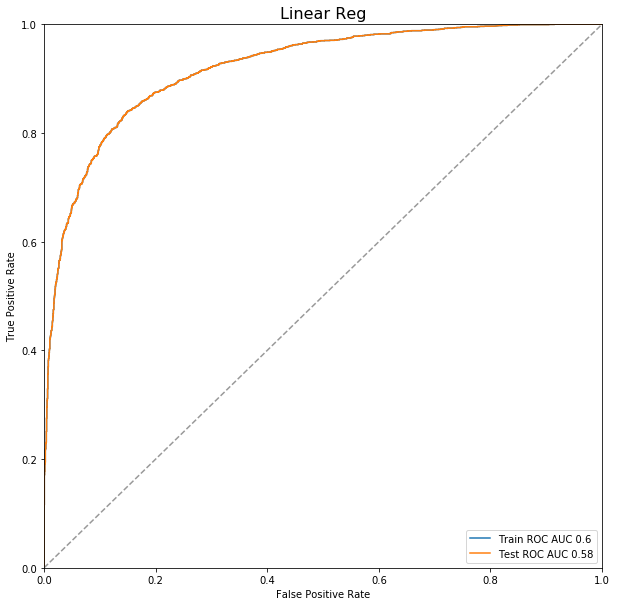

In [768]:
roc_auc_train = np.round(roc_auc_score(y_train, y_train_pred), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_pred), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)


matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Reg', size=16)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Попробуем запихать побольше переменных

In [771]:
x_test.head()

,mean_day_of_week_number_1,count_MCC_simp_5331,sum_day_of_week_number_0,sum_part_of_day_1,count_trx_category_BACK_TRX,sum_MCC_simp_5812,mean_trx_category_CAT,sum_currency_simp_other currency,count_MCC_simp_5200,sum_trx_category_CAT,...,count_MCC_simp_5261,mean_trx_category_C2C_IN,count_MCC_simp_6012,mean_weekend_1,sum_trx_category_CASH_ADV,sum_MCC_simp_5732,sum_trx_category_C2C_IN,mean_trx_category_BACK_TRX,mean_day_of_week_number_6,mean_trx_category_CASH_ADV
1501,2257.694286,3.0,11409.15,60000.0,0.0,2115.0,0.000000,0.0,0.0,0.00,...,0.0,8000.0,4.0,4472.620000,0.0,3200.0,8000.0,0.0,7852.928889,0.0
2586,3774.108421,2.0,247917.01,365600.0,0.0,50287.0,0.000000,0.0,2.0,0.00,...,0.0,50500.0,4.0,2294.108475,0.0,290.0,50500.0,0.0,2198.409143,0.0
2653,5868.777500,0.0,22127.58,0.0,0.0,0.0,0.000000,0.0,1.0,0.00,...,0.0,0.0,0.0,4273.828333,0.0,0.0,0.0,0.0,6430.416667,0.0
1055,1231.622667,2.0,37279.13,11700.0,0.0,3785.0,0.000000,0.0,0.0,0.00,...,1.0,0.0,0.0,2403.110099,0.0,0.0,0.0,0.0,1567.343902,0.0
705,1940.494722,0.0,113092.00,98059.0,2.0,2387.0,477.605833,0.0,0.0,5731.27,...,1.0,0.0,0.0,1999.188235,0.0,0.0,0.0,3995.0,2692.390000,0.0


In [772]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


#Make predictions using the testing set
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)


# The coefficients
print('Coefficients: \n', lin_reg.coef_,)
# The mean squared error
print("Mean squared error_train: %.2f"
      % mean_squared_error(y_test, y_test_pred))
# The mean squared error
print("Mean squared error_test: %.2f"
      % mean_squared_error(y_train, y_train_pred))


# Explained variance score: 1 is perfect prediction
print('Variance score_train: %.2f' % r2_score(y_train, y_train_pred)) 
    
print('Variance score_test: %.2f' % r2_score(y_test, y_test_pred)) 

Coefficients: 
 [-2.76966603e-06  7.24969306e-03  2.77097075e-07  1.10272060e-07
  1.08257319e-02  4.54409417e-07  4.88568496e-07  3.07753828e-08
 -8.41486948e-03 -1.63290201e-07  2.38659073e-06  2.06051366e-07
 -8.95093837e-07  8.29686628e-08 -2.76727014e-08  6.88934575e-07
 -8.45931415e-08  4.76923205e-07  9.93566841e-04  5.02685137e-08
  5.62949745e-07 -4.80277881e-03  1.96660325e-07 -8.62376773e-04
 -2.23157950e-06 -8.76166150e-06  4.52277810e-07 -1.54310370e-07
 -1.34037775e-06 -8.23199078e-07  1.55383638e-05]
Mean squared error_train: 0.34
Mean squared error_test: 0.24
Variance score_train: 0.05
Variance score_test: -0.40


Train:  0.63
Test:  0.58


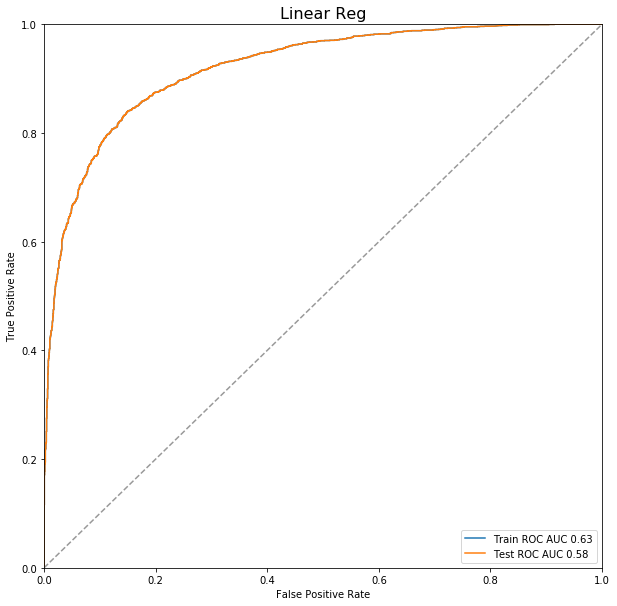

In [773]:
# Вообщем ситация не сильно изменилась, 
roc_auc_train = np.round(roc_auc_score(y_train, y_train_pred), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_pred), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)


matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Reg', size=16)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Попробуем метод xgboost, для сокращенного набора

In [788]:
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost
#ROC AUC -0.5 случайное угадывание
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
xgb.fit(x_train, y_train)
y_train_predict = xgb.predict_proba(x_train)[:, 1]
y_test_predict = xgb.predict_proba(x_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.87
Test:  0.69


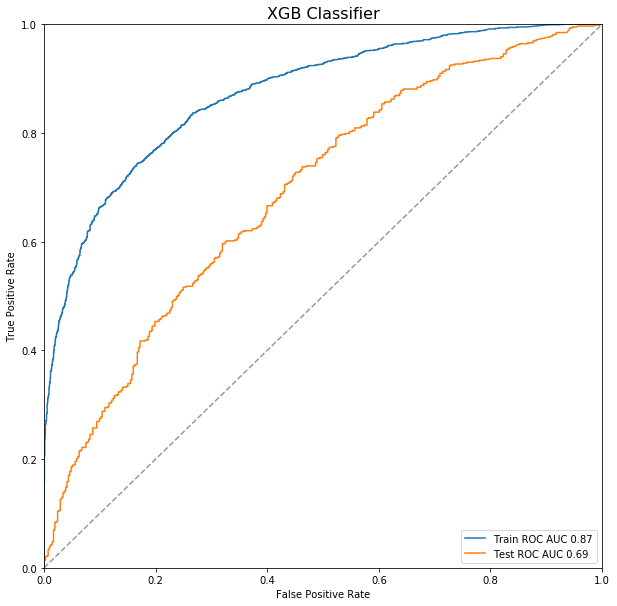

In [789]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Для увеличеннго набора увеличивается точность

In [784]:
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost
#ROC AUC -0.5 случайное угадывание
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
xgb.fit(x_train, y_train)
y_train_predict = xgb.predict_proba(x_train)[:, 1]
y_test_predict = xgb.predict_proba(x_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.93
Test:  0.76


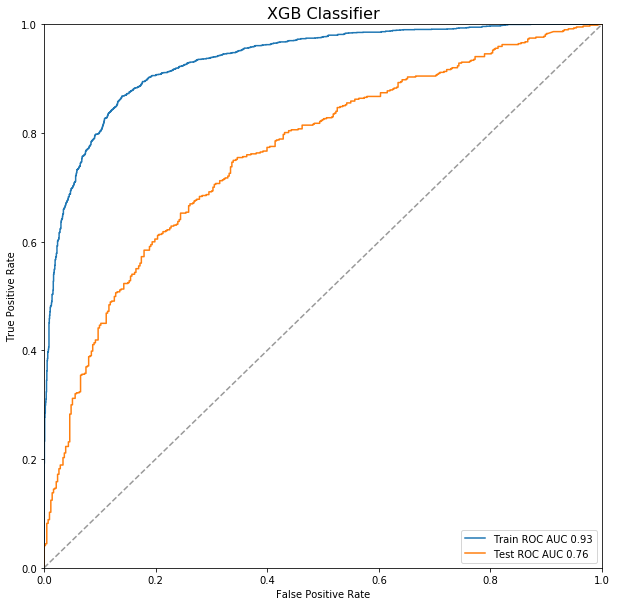

In [785]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

Честно говоря не смог разобраться как решение запихнуть в соревнование